## 主成分分析和聚类

# 主成分分析 PCA

在无监督学习中最常见的任务之一是降维，也就是减少输入数据的维数。 为什么要降维呢？主要有一下几个原因：首先，降维可能有助于数据可视化，因为人是无法理解高维数据的，通常只能看明白二维或三维数据的可视化图像。其次，降维可以有效的解决维度灾难的问题，改善模型的训练效果。此外，降维还可以进行数据压缩，提升模型训练效率。

#### 莺尾花数据集

上面主要讲述了主成分分析方法的原理，现在通过实例来加深理解。首先导入所有实验所用到的基本模块。

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

通过 scikit-learn 提供的数据集接口导入莺尾花数据集。

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

为了直观地查看数据的分布，使用三维图画出莺尾花的数据分布图。

[Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, ''),
 Text(5.0, 0, ''),
 Text(6.0, 0, ''),
 Text(7.0, 0, ''),
 Text(8.0, 0, '')]

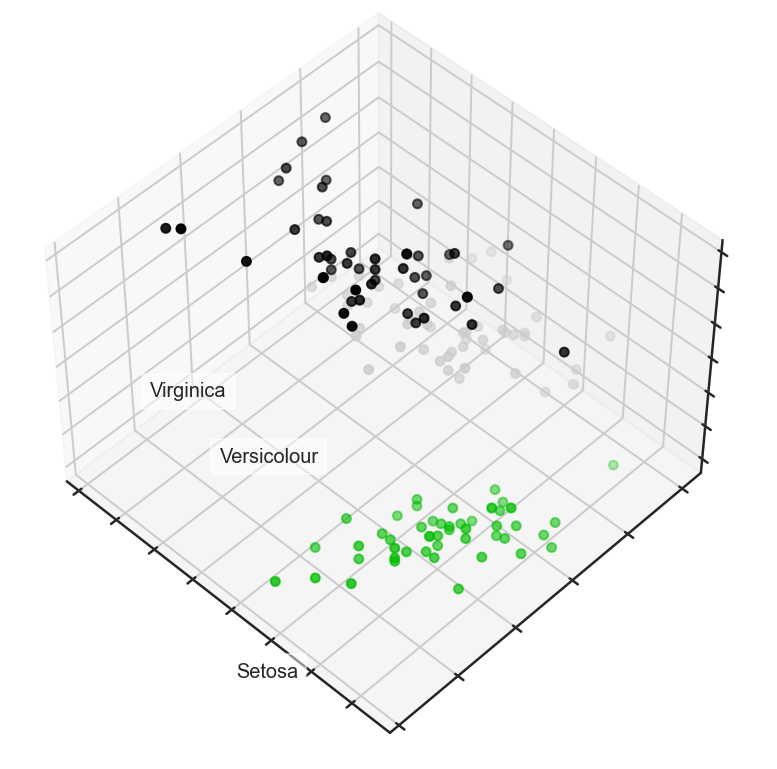

In [3]:
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# 改变标签的顺序，让其与数据匹配
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr,
           cmap=plt.cm.nipy_spectral)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

现在让我们看看使用 PCA 是怎么样提高模型的识别性能的。同样先导入实验所用到的模块。

In [4]:
from sklearn.tree import DecisionTreeClassifier  # 导入决策树模型、
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score  # 识别准确率计算函数

莺尾花数据是一个相对容易区分的数据。因此，为了使实验结果对比明显。选用简单的决策树模型来对莺尾花数据进行分类。

In [5]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                    stratify=y,
                                                    random_state=42)

# 决策树的深度设置为 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test,
                                               preds.argmax(axis=1))))

Accuracy: 0.88889


从上面的结果可知。在不对数据进行处理的情况下，使用决策树模型对莺尾花数据进行分类的准确率为 0.88889。

现在使用 PCA 将莺尾花数据的维度降低到 2 维，然后画出降维后的数据分布图。

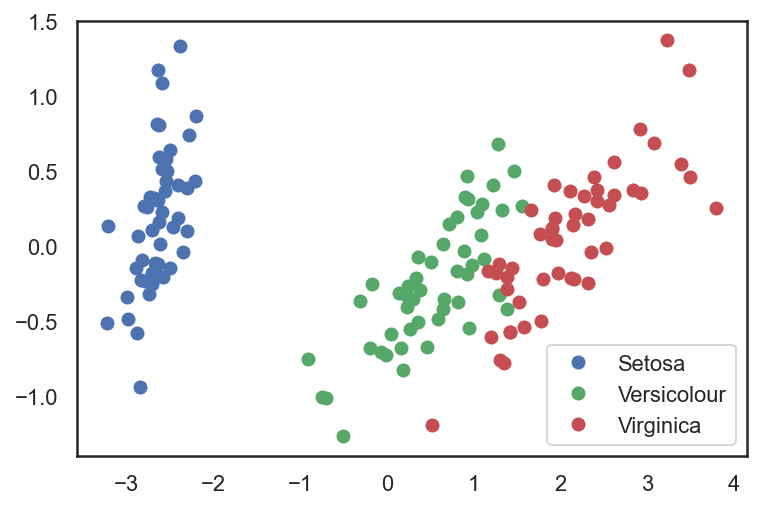

In [6]:
# 使用从 sklearn 提供的 PCA 接口，降数据降到 2 维
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

# 可视化 PCA 降维后的结果
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0)

同样的方法，将降维后的莺尾花数据输入到决策树模型中。

In [7]:
# 训练集合测试集同时使用 PCA 进行降维
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3,
                                                    stratify=y,
                                                    random_state=42)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test,
                                               preds.argmax(axis=1))))

Accuracy: 0.91111


从上面的结果可知，对数据进行 PCA 降维之后，决策树模型的识别准确率提升到了 0.91111。这说明了 PCA 确实可以有效改善大部分机器学习算法的准确性和计算效率。

那么降维后的每个主成分都来自于原始数据的哪些维度呢？让我们通过查看每个维度的方差百分比来解释这个问题。

In [8]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1,
                                                         round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

1 component: 92.46% of initial variance
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
2 component: 5.31% of initial variance
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


从上面结果可知，我们将 4 维的数据降为了 2 维数据。在降维后的数据中，第一维（也就是第一个成分）主要由原始数据的 $0.361 * \text { sepallength }-0.085 * \text { sepalwidth }+0.857 * \text { petallength }+0.358 * \text { petalwidth }$ 组成。

### 聚类

聚类是无监督学习算法中的一种。聚类背后的主要思想相对简单，往往可以根据数据点之间的距离来将同类样本聚合在一起。

#### K-Means 聚类

K-Means 算法是所有聚类算法中最流行且最简单的算法。 下面是它的工作原理：

1. 选择认为最佳的类别数量 $k$，即样本大概可以分为多少个簇。
2. 在数据空间内随机初始化 $k$ 点为“质心”。
3. 将每个观察数据点划分到于其最近的簇的质心的簇。
4. 将质心更新为一个簇中所有数据点的中心。
5. 重复步骤 3 和 4 步骤直到所有质心都相对稳定。

为了更好的理解 K-Means 算法的原理，这里通过一个例子来进行说明。先构建出一个数据集并画图它的分布图，该数据集含有三个簇。

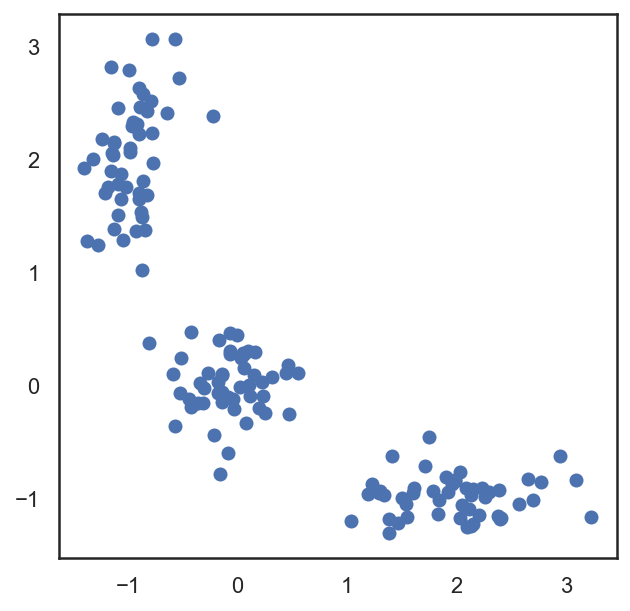

In [14]:
# 构造可分为三个簇的数据
X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], 'bo')

开始动手实现 K-Means 算法， K-Means 算法的实现非常简单。按照上述的算法步骤逐步实现即可。在这里，我们使用欧几里德距离来衡量两个数据点之间的距离。当然，你也可以使用其他距离度量方式。 

In [15]:
# 调用 Scipy 库的距离计算函数，
# 用于计算数据点之间的距离
from scipy.spatial.distance import cdist

# 随机初始化三个中心点
np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1., size=6)
centroids = centroids.reshape((3, 2))

cent_history = []
cent_history.append(centroids)

for i in range(3):
    # 计算每个点到中心的距离
    distances = cdist(X, centroids)
    # 获取数据别分到哪个簇
    labels = distances.argmin(axis=1)
    # 根据数据到每个簇质心的距离，标记这些点的类别
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)

    cent_history.append(centroids)

可视化出 K-Means 算法的运行过程，以便更好地理解。

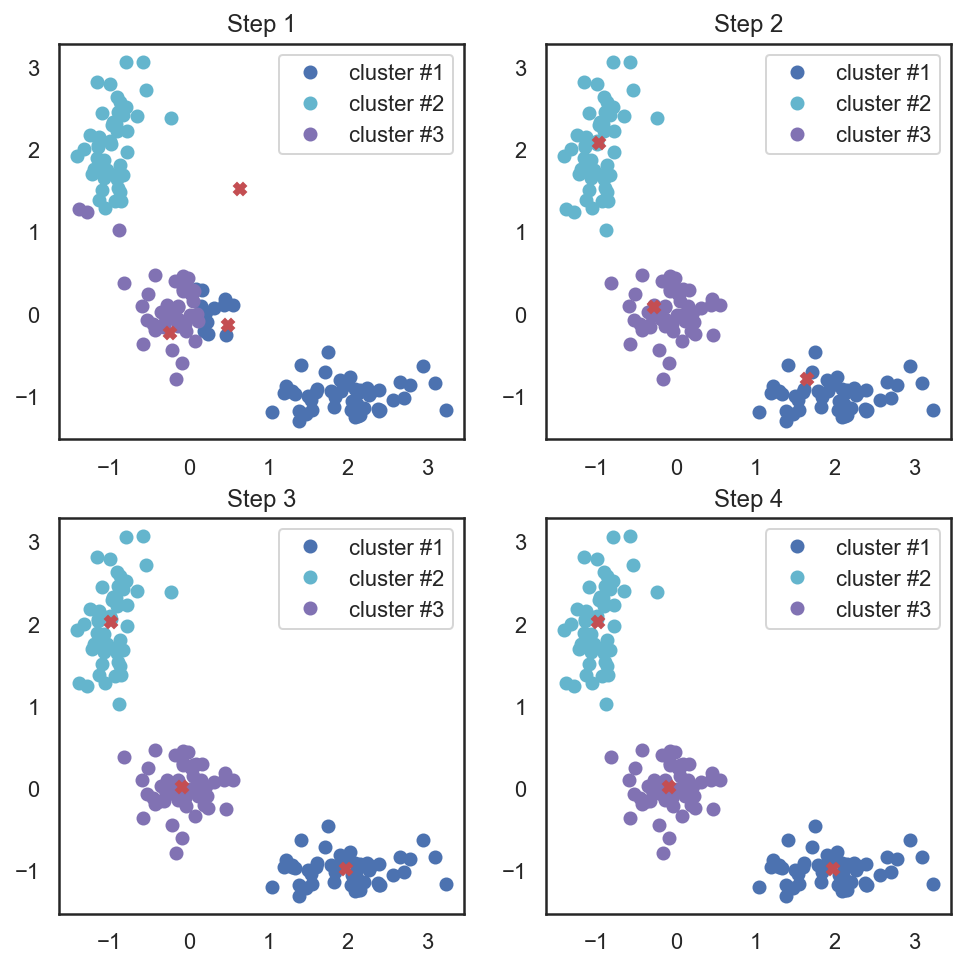

In [16]:
# 可视化 K 均值聚类步骤
plt.figure(figsize=(8, 8))
for i in range(4):
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)

    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label='cluster #1')
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2')
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
    plt.legend(loc=0)
    plt.title('Step {:}'.format(i + 1))

从上图中可以看出，仅用两步模型就收敛了，速度非常之快。但该算法有一个缺点，就是它对聚类质心的初始位置的很敏感，也即是随机选取的初始质心值。但是，可以多次运行算法，然后平均所有质心结果。

#### K-均值算法中 K 值的选择

相比于分类和回归等监督学习任务，聚类算法没有使用含标签的数据。因此，聚类需要更有效的模型评价方法。 通常，当使用 K-Means 算法时，需要最小化观测数据点与其所在的簇的质心之间的平方距离之和。该值越小说明该类聚得越好。公式表达如下：

$$ J(C) = \sum_{k=1}^K\sum_{i~\in~C_k} ||x_i - \mu_k|| \rightarrow \min\limits_C,$$

这里的 $C_k$  是第 $k$ 个簇所有样本的集合，$\mu_k$ 是 $C_k$ 的中心。

上面的定义看似合理，也就是希望数据点尽可能接近它们所属簇的质心。但也存在一个问题，当质心数（也就是 K 的值）等于样本数时，公式得到最优解，即 $J(C)$ 达到最小。此时的每个样本都会单独把自己作为一类。这显然是没有意义的。因为这结果相当于没有进行聚类。

为了避免这种情况，我们应该定义一个函数，使得 $J(C)$ 下降得不那么快。使用公式描述如下：

$$ D(k) = \frac{|J(C_k) - J(C_{k+1})|}{|J(C_{k-1}) - J(C_k)|}  \rightarrow \min\limits_k $$

为了更好的理解，先看看一个例子。因为 scikit-learn 也提供了各种聚类算法接口，而且使用这些接口有许多优点。例如：这些算法可以并行完成，有效减少了计算时间。所以在这里为了方便，直接使用 scikit-learn 提供的 K-Means 接口进行实验。

In [17]:
from sklearn.cluster import KMeans  # 导入 K-均值聚类模型

求出 K 值得选择与 $J(C_k)$ 的关系，并画出它们的关系图。

Text(0, 0.5, '$J(C_k)$')

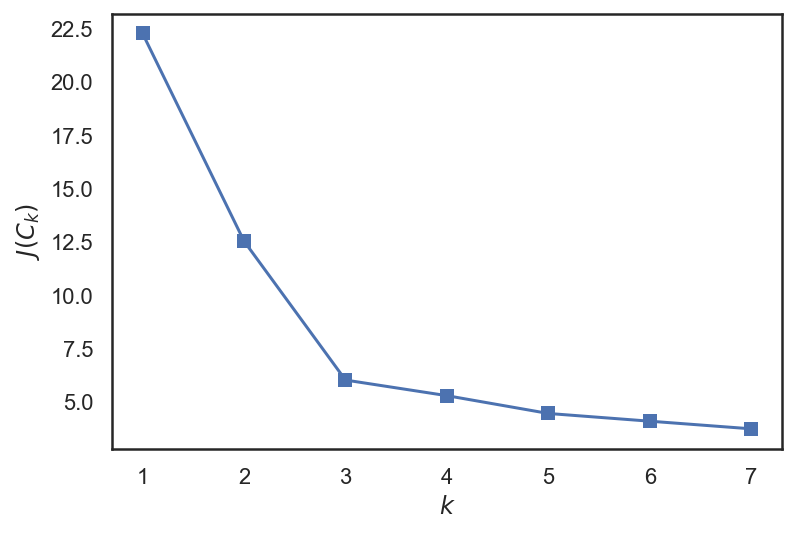

In [18]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(1, 8), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

从上图中，可以看到当 $k$ 小于 3 时， $J(C_k)$ 下降得非常快。之后相对平稳。这意味着选择 $k$ 等于 3 最为合适。

#### K-均值存在的问题

实际上，K-Means 算法是一个 $\text{NPhard}$ 问题。对于 $n$ 个 $d$ 维数据，当我们想要将其聚为 $k$ 个簇时，K-Means 算法的复杂度为 $O(n^{d k+1})$ ，这意味着模型的训练需要大量的时间。不过，这里有一些启发式方法可以缓解这个问题，例如像 MiniBatch K-Means 算法。
它每次仅采用部分数据而不是一次使用整个数据集，然后通过前面所述的方法，通过一个簇中所有观测点的平均值来移动质心。

关于 K-Means 和 MiniBatch K-Means 的区别或差异可以查阅这份 [<i class="fa fa-external-link-square" aria-hidden="true"> scikit-learn 文档</i>](http://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html) 。

现在用凝聚聚类实现一下前面使用 K-Means 实现的聚类例子，这里直接调用 SciPy 提供的接口。 

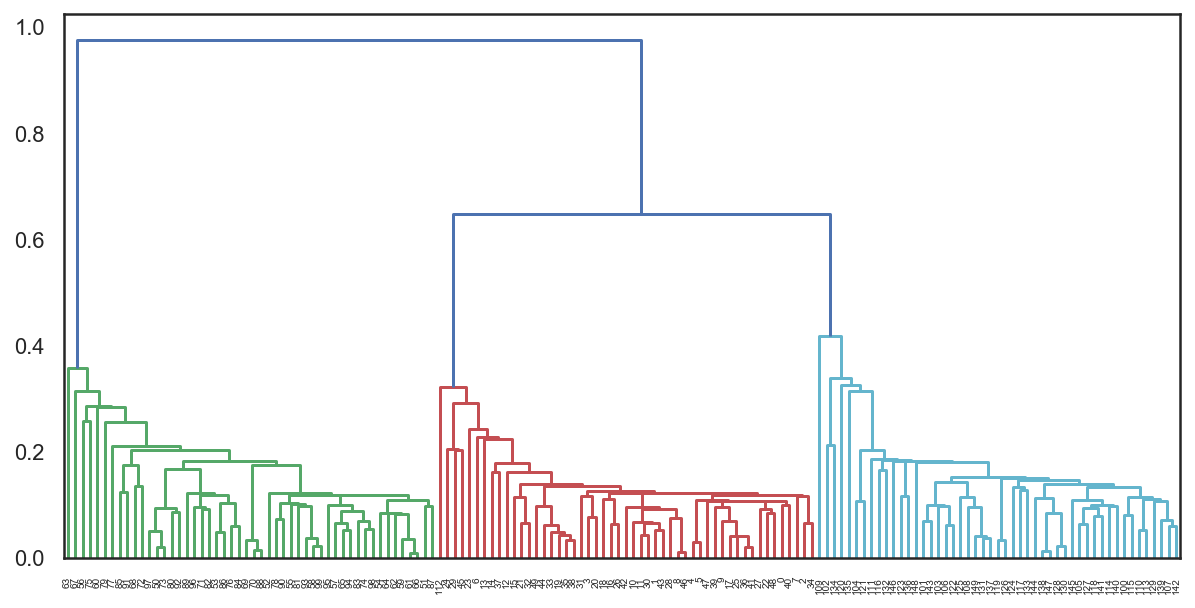

In [19]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = np.zeros((150, 2))
# 构建数据集
np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

# pdist将计算成对距离矩阵的上三角形
distance_mat = pdist(X)
# 连接 - 是一种凝聚算法的实现
Z = hierarchy.linkage(distance_mat, 'single')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

上图显示的是一个凝聚聚类的树状图。从上图可以清晰的看到整个聚类的过程：先把每个样本作为一个簇，经过多次迭代最终聚为一个簇的过程。

### 聚类模型评价

聚类算法与许多的监督学习算法不同，因为聚类在训练时不需要数据标签，所以不能简单地使用监督学习的评价方法来进行评价。

聚类算法通常有内部和外部的评价标准。 外部评价指标是使用有关已知真实划分的信息，也就是要知道数据的真实类别。而内部指标不需要知道数据的真实类别，仅根据聚类结果来进行评估。

最后，通过实验来看看这些指标是如何评价 MNIST 手写数字数据集的，先导入必要的模块：

In [20]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering

加载数据，并构建不同的聚类算法。

In [21]:
data = datasets.load_digits()
X, y = data.data, data.target

algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=10, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=10))

使用不同评价指标对不同的聚类算法进行评价。

In [22]:
data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_, average_method='arithmetic'),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity', 'Completeness',
                                           'V-measure', 'Silhouette'],
                       index=['K-means', 'Affinity', 'Spectral', 'Agglomerative'])
results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.662295,0.736567,0.735448,0.742972,0.739191,0.182097
Affinity,0.175174,0.612460,0.958907,0.486901,0.645857,0.115197
Spectral,0.756461,0.852040,0.831691,0.876614,0.853562,0.182729
Agglomerative,0.794003,0.866832,0.857513,0.879096,0.868170,0.178497


# 多维缩放降维MDS模型

stress(n_components=4) : 10.75235983997886
stress(n_components=3) : 12.138570891006164
stress(n_components=2) : 248.05263707125346
stress(n_components=1) : 31957.36543318361


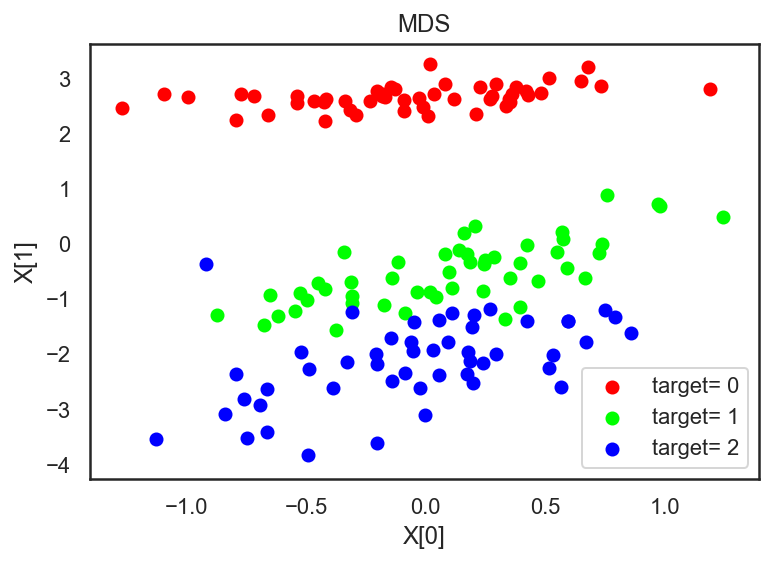

In [23]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets,manifold

def load_data():
    '''
    加载用于降维的数据
    '''
    # 使用 scikit-learn 自带的 iris 数据集
    iris=datasets.load_iris()
    return  iris.data,iris.target

#多维缩放降维MDS模型
def test_MDS(*data):
    X,y=data
    # 依次考察降维目标为 4维、3维、2维、1维
    for n in [4,3,2,1]: 
        mds=manifold.MDS(n_components=n)
        mds.fit(X)
        print('stress(n_components=%d) : %s'% (n, str(mds.stress_)))
        
# 产生用于降维的数据集
X,y=load_data()
# 调用 test_MDS
test_MDS(X,y)   


def plot_MDS(*data):
    '''
    绘制经过 使用 MDS 降维到二维之后的样本点
    '''
    X,y=data
    mds=manifold.MDS(n_components=2)
    #原始数据集转换到二维
    X_r=mds.fit_transform(X) 

    ### 绘制二维图形
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    # 颜色集合，不同标记的样本染不同的颜色
    colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),(0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2))
    for label ,color in zip( np.unique(y),colors):
        position=y==label
        ax.scatter(X_r[position,0],X_r[position,1],label="target= %d"%label,color=color)

    ax.set_xlabel("X[0]")
    ax.set_ylabel("X[1]")
    ax.legend(loc="best")
    ax.set_title("MDS")
    plt.show()

# 调用 plot_MDS
plot_MDS(X,y)   

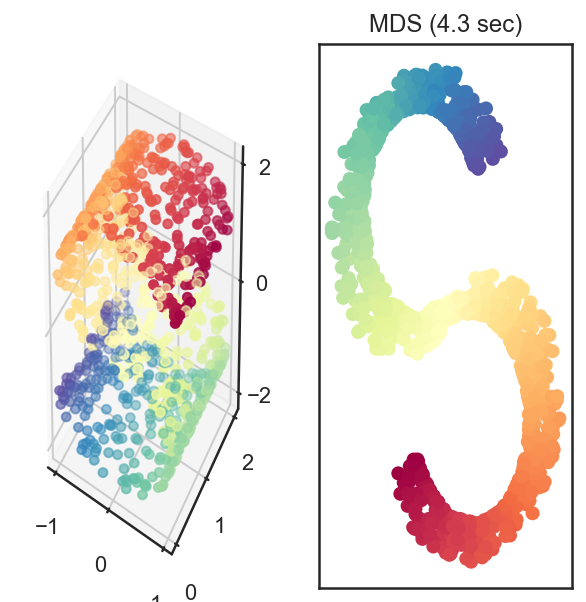

In [24]:
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# 制造样本
n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10

fig = plt.figure(figsize=(5, 5))  #画板
gs = fig.add_gridspec(1,2)  #共2副子图
ax1 = fig.add_subplot(gs[0,0], projection='3d')  #第一幅子图表示原始样本分布
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

# MDS降维
n_components = 2

t0 = time()  #计时开始
mds = manifold.MDS(n_components, max_iter=100, n_init=1)  #建立MDS模型
Y = mds.fit_transform(X)
t1 = time()  #计时结束
ax2 = fig.add_subplot(gs[0,1])
ax2.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)  #第2副子图表示降维后样本分布
ax2.set_title("MDS (%.2g sec)" % (t1 - t0))
ax2.xaxis.set_major_formatter(NullFormatter())
ax2.yaxis.set_major_formatter(NullFormatter())

plt.show()